In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('carprices.csv')

In [3]:
df.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [4]:
from sklearn.preprocessing import OneHotEncoder

In [29]:
encoder=OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [30]:
encoder.fit(df[['Car Model']])

,"categories categories: 'auto' or a list of array-like, default='auto'Categories (unique values) per feature:- 'auto' : Determine categories automatically from the training data.- list : ``categories[i]`` holds the categories expected in the ith column. The passed categories should not mix strings and numeric values within a single feature, and should be sorted in case of numeric values.The used categories can be found in the ``categories_`` attribute... versionadded:: 0.20",'auto'
,"drop drop: {'first', 'if_binary'} or an array-like of shape (n_features,), default=NoneSpecifies a methodology to use to drop one of the categories perfeature. This is useful in situations where perfectly collinearfeatures cause problems, such as when feeding the resulting datainto an unregularized linear regression model.However, dropping one category breaks the symmetry of the originalrepresentation and can therefore induce a bias in downstream models,for instance for penalized linear classification or regression models.- None : retain all features (the default).- 'first' : drop the first category in each feature. If only one category is present, the feature will be dropped entirely.- 'if_binary' : drop the first category in each feature with two categories. Features with 1 or more than 2 categories are left intact.- array : ``drop[i]`` is the category in feature ``X[:, i]`` that should be dropped.When `max_categories` or `min_frequency` is configured to groupinfrequent categories, the dropping behavior is handled after thegrouping... versionadded:: 0.21 The parameter `drop` was added in 0.21... versionchanged:: 0.23 The option `drop='if_binary'` was added in 0.23... versionchanged:: 1.1 Support for dropping infrequent categories.",None
,"sparse_output sparse_output: bool, default=TrueWhen ``True``, it returns a :class:`scipy.sparse.csr_matrix`,i.e. a sparse matrix in ""Compressed Sparse Row"" (CSR) format... versionadded:: 1.2 `sparse` was renamed to `sparse_output`",False
,"dtype dtype: number type, default=np.float64Desired dtype of output.",<class 'numpy.float64'>
,"handle_unknown handle_unknown: {'error', 'ignore', 'infrequent_if_exist', 'warn'}, default='error'Specifies the way unknown categories are handled during :meth:`transform`.- 'error' : Raise an error if an unknown category is present during transform.- 'ignore' : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will be all zeros. In the inverse transform, an unknown category will be denoted as None.- 'infrequent_if_exist' : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will map to the infrequent category if it exists. The infrequent category will be mapped to the last position in the encoding. During inverse transform, an unknown category will be mapped to the category denoted `'infrequent'` if it exists. If the `'infrequent'` category does not exist, then :meth:`transform` and :meth:`inverse_transform` will handle an unknown category as with `handle_unknown='ignore'`. Infrequent categories exist based on `min_frequency` and `max_categories`. Read more in the :ref:`User Guide `.- 'warn' : When an unknown category is encountered during transform a warning is issued, and the encoding then proceeds as described for `handle_unknown=""infrequent_if_exist""`... versionchanged:: 1.1 `'infrequent_if_exist'` was added to automatically handle unknown categories and infrequent categories... versionadded:: 1.6 The option `""warn""` was added in 1.6.",'ignore'
,"min_frequency min_frequency: int or float, default=NoneSpecifies the minimum frequency below which a category will beconsidered infrequent.- If `int`, categories with a smaller cardinality will be considered infrequent.- If `float`, categories with a smaller cardinality than `min_frequency * n_samples` will be considered infrequent... versionadded:: 1.1 Read more in the :ref:`User Guide `.",None
,"max_cate

In [31]:
encoded=encoder.transform(df[['Car Model']])

In [32]:
encoded

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [34]:
encoded.shape

(13, 3)

In [35]:
from sklearn import linear_model

In [36]:
reg=linear_model.LinearRegression()

In [38]:
encoded_df=pd.DataFrame(
    encoded,
    columns=['BMW X5','Audi A5','Mercedes_Benz C']
)

In [39]:
encoded_df

,BMW X5,Audi A5,Mercedes_Benz C
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,0.0,0.0,1.0


In [41]:
df_new = pd.concat([df, encoded_df], axis=1)

In [42]:
df_new

,Car Model,Mileage,Sell Price($),Age(yrs),BMW X5,Audi A5,Mercedes_Benz C
0,BMW X5,69000,18000,6,0.0,1.0,0.0
1,BMW X5,35000,34000,3,0.0,1.0,0.0
2,BMW X5,57000,26100,5,0.0,1.0,0.0
3,BMW X5,22500,40000,2,0.0,1.0,0.0
4,BMW X5,46000,31500,4,0.0,1.0,0.0
5,Audi A5,59000,29400,5,1.0,0.0,0.0
6,Audi A5,52000,32000,5,1.0,0.0,0.0
7,Audi A5,72000,19300,6,1.0,0.0,0.0
8,Audi A5,91000,12000,8,1.0,0.0,0.0
9,Mercedez Benz C class,67000,22000,6,0.0,0.0,1.0


In [70]:
X=df_new[['Mileage','Age(yrs)','BMW X5','Audi A5','Mercedes_Benz C']]
y=df_new['Sell Price($)']

In [71]:
reg.fit(X,y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [72]:
reg.predict([[69000,6,0.0,1.0,0.0]])

array([18705.2723644])

In [73]:
import warnings
warnings.filterwarnings('ignore')

    

In [76]:
predict=[]
predict.append(reg.predict(X))
predict

[array([18705.2723644 , 35286.78445645, 24479.19112468, 41245.76426391,
        29882.98779056, 28023.6135243 , 30614.46818502, 21879.57266964,
        12182.34562104, 26183.72387884, 18929.31674102, 20409.80511857,
        30477.15426156])]

In [80]:
import numpy as np
predict_a=np.array(predict)

In [87]:
p_final=predict_a.reshape(13,1)

In [88]:
p_final.shape

(13, 1)

In [90]:
df_new['prediction']=p_final

In [91]:
df_new.head()

,Car Model,Mileage,Sell Price($),Age(yrs),BMW X5,Audi A5,Mercedes_Benz C,prediction
0,BMW X5,69000,18000,6,0.0,1.0,0.0,18705.272364
1,BMW X5,35000,34000,3,0.0,1.0,0.0,35286.784456
2,BMW X5,57000,26100,5,0.0,1.0,0.0,24479.191125
3,BMW X5,22500,40000,2,0.0,1.0,0.0,41245.764264
4,BMW X5,46000,31500,4,0.0,1.0,0.0,29882.987791


In [93]:
from sklearn.metrics import root_mean_squared_log_error,r2_score

In [94]:
rmse=root_mean_squared_log_error(df_new['Sell Price($)'],df_new['prediction'])

In [95]:
rmse

0.07409778945731794

In [96]:
r2s=r2_score(df_new['Sell Price($)'],df_new['prediction'])

In [97]:
r2s

0.9417050937281082

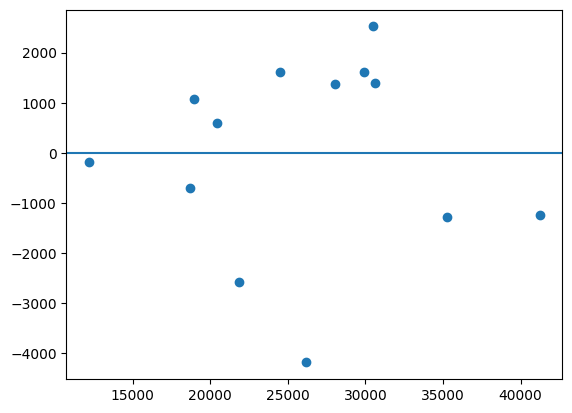

In [99]:
from matplotlib import pyplot as plt
residual=df_new['Sell Price($)']-df_new['prediction']
plt.scatter(df_new['prediction'],residual)
plt.axhline(0)